Run all cells in this notebook once to setup the EfficientDet-d7

Before running this notebook, clone the repository 
https://github.com/grupesh/social-distancing-monitoring.git

1. Checkout the detector branch (git checkout detector)
2. Change directory to automl/efficientdet/
3. Install dependencies by running
    1. pip install -r requirements.txt
    2. pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

# Download Model

This might take a while!

If wget doesn't work for you, please directly download the tar file from link and unzip the efficientdet-d7 folder to the current working directory

In [2]:
import os
import sys
import tensorflow.compat.v1 as tf
MODEL = 'efficientdet-d7'  #@param

def download(m):
  if m not in os.listdir():
    !wget --no-check-certificate https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{m}.tar.gz
    !tar zxf {m}.tar.gz
  ckpt_path = os.path.join(os.getcwd(), m)
  return ckpt_path

# Download checkpoint.
ckpt_path = download(MODEL)
print('Use model in {}'.format(ckpt_path))

Use model in C:\Users\grupesh\eecs504_project\automl\efficientdet\efficientdet-d7


# Export Model

This would take a while!

Ignore the warnings about cuda error if you do not have a gpu support

In [3]:
saved_model_dir = 'savedmodel'
!rm -rf {saved_model_dir}
!python model_inspect.py --runmode=saved_model --model_name={MODEL} \
  --ckpt_path={ckpt_path} --saved_model_dir={saved_model_dir}

2020-12-08 18:47:47.912726: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-12-08 18:47:47.912890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2020-12-08 18:47:49.938257: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-12-08 18:47:49.944518: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x21774806f50 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-12-08 18:47:49.944666: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-

# Test your setup

Run this block to test if detector model is working for you

If everything above went okay, this should write the output image with detections to 'serve_image_out\0.jpg'

In [4]:
serve_image_out = 'serve_image_out'
if not os.path.exists(serve_image_out):
    !mkdir {serve_image_out}

min_score_thresh = 0.35  #@param
max_boxes_to_draw = 200  #@param
line_thickness =   2#@param

!python model_inspect.py --runmode=saved_model_infer \
  --saved_model_dir={saved_model_dir} \
  --model_name={MODEL}  --input_image=testdata/img1.jpg  \
  --output_image_dir={serve_image_out} \
  --min_score_thresh={min_score_thresh}  --max_boxes_to_draw={max_boxes_to_draw}

all_files= ['testdata\\img1.jpg']
writing file to serve_image_out\0.jpg


2020-12-08 18:50:18.009466: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-12-08 18:50:18.010046: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2020-12-08 18:50:22.584441: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-12-08 18:50:22.599162: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x29120f00060 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-12-08 18:50:22.599839: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-

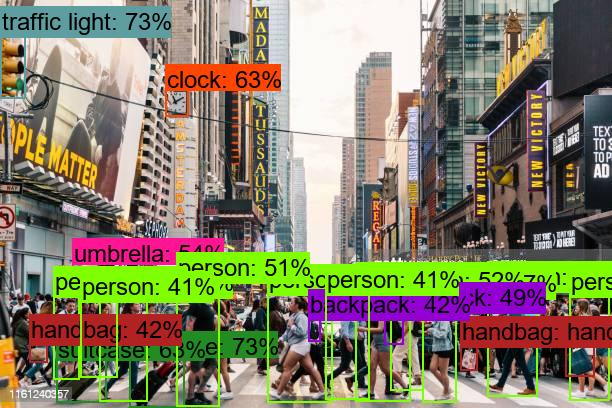

In [5]:
from IPython import display
display.display(display.Image(os.path.join(serve_image_out, '0.jpg')))